In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import fsolve
from scipy import integrate


plt.rcParams["figure.figsize"] = (10,5)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [2]:
# Mpc-1 to Gev
Mpc = 3.085677581*10**22             #Mpc in m
c = 2.9979*10**8                     #Speed of Light m/s
hbar = 1.0545718 * 10**-34           #Reduced Planck Constant Js
e_char = 1.602176634*10**-19         #Electron's Charge C

Mpc_inv = 1/Mpc*c*hbar/e_char/10**9  #Transforms Mpc-1 to Gev
print("Mpc-1 = ",Mpc_inv, "Gev")

h = 0.6766                           #km/s/Mpc
H0_Gev = 100*h/(c/1000)*Mpc_inv      #H0/c Gev
print("H0/c = ",H0_Gev, "Gev")

G = 6.67408*10**-11                  #Gravitational Constant in m3 kg-1 s-2
M_Pl = np.sqrt(hbar*c/(8*np.pi*G)) * c**2 / e_char / 10**9
                                     #Planck Mass Gev
print("M_p = ",M_Pl, "Gev")

m_e = 9.10938356 * 10**-31           #Electron's Mass
Mu_B = e_char * hbar / (2 * m_e) / 10**4 / e_char / 10**9
                                     #Bohr Magneton
print("Mu_B = ",Mu_B, "Gev/G")

Mu_e = 2.0010 / 2 * Mu_B             #e Magneton
print("Mu_e = ",Mu_e, "Gev/G")

om_dm = 0.11933/h**2                 #D-Matter Density
print("om_dm = ",om_dm)

coeff = 10**21 * Mpc_inv * 10**-9 / Mu_e * M_Pl / 10**-22 * H0_Gev * 10**9 * np.sqrt(8*om_dm/3) * (3/2)
print("coeff = ",coeff)
print(1/(10*coeff))

Mpc-1 =  6.394879377142085e-39 Gev
H0/c =  1.4432687503166666e-42 Gev
M_p =  2.435313658990243e+18 Gev
Mu_B =  5.788381799130213e-18 Gev/G
Mu_e =  5.791275990029778e-18 Gev/G
om_dm =  0.26066675992680977
coeff =  0.04853764040483738
2.0602567237700695


In [3]:
# Reading kk, Pk from CLASS code for redshift of 20
fhand = open("kk_pk_z20.txt","r")
kk = []
Pk = []

count = 0
for line in fhand:
    count = count + 1
    if count != 1:
        words = line.split()
        kk.append(float(words[0]))
        Pk.append(float(words[1]))

# print(count)
# print(len(kk))

# plot P(k)
# plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
# plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
# plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=30)
# plt.plot(kk,Pk,'b-')
# plt.legend(["z=20"])
# plt.savefig('warmup_pk.pdf')

kka = np.array(kk)
Pka = np.array(Pk)
k3pk = kka**3 * Pka / (2*np.pi**2)

# plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],kka[-1])
# plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=20)
# plt.ylabel(r'$\frac{k^3 P(k)}{2\pi^2} \,\,\,\,$', fontsize=30)
# plt.plot(kka,k3pk,'b-')
# plt.savefig('dimless_power.pdf')

In [4]:
##### calculating B_rms as a function of mass and coupling
# ma = np.logspace(-26,-19,8)
# ga = np.logspace(-13,-6,8)
# ma = np.logspace(-19,-10,10)
# ga = np.logspace(-13,-6,8)
# ma = np.logspace(-30,-20,11)
# ga = np.logspace(-13,-6,20)
ma = np.logspace(-35,-20,20)
ga = np.logspace(-13,-6,20)

Beffk_all = np.zeros((len(ma), len(ga), len(kka)))
kJ_m = np.zeros(len(ma))

t_test = 0.01 * 2/(3*H0_Gev*10**-9)
a_test = 1/21.0

counter_m = -1
counter_g = -1
for mm in ma:
    counter_m = counter_m + 1
#     print("m =", mm, "ev")
############################################change here sin=cos=1 ###########################################
#     c_test = 2 * M_Pl * 10**9 / mm * np.sqrt(om_dm/3) * np.cos(mm*t_test)
    c_test = 2 * M_Pl * 10**9 / mm * np.sqrt(om_dm/3)
############################################change here sin=cos=1 ###########################################

#     print("c_test =", c_test, '\n')
    Dk = c_test * k3pk**(0.5)
############################################change here sin=cos=1 ###########################################
#     Ck = Dk * ( ((kka/(4*mm*a_test))**2)/((kka/(4*mm*a_test))**2+1) -
#            np.cos(2*mm*t_test) ) / np.sin(2*mm*t_test)
    Ck = Dk * ( ((kka/(4*mm*a_test))**2)/((kka/(4*mm*a_test))**2+1) - 1)
############################################change here sin=cos=1 ###########################################

#     kJ_m[counter_m] = 66.5 * (1/(20+1))**(1/4) * (mm/10**-22)**(0.5) *(om_dm * h**2/ 0.12)**(0.25) / (20+1) / h
    kJ_m[counter_m] = 66.5 * (1/(20+1))**(1/4) * (mm/10**-22)**(0.5) *(om_dm * h**2/ 0.12)**(0.25) / h
    for gg in ga:
        counter_g = counter_g + 1
#         print(counter_m,counter_g)
############################################change here sin=cos=1 ###########################################
        Beffk_all[counter_m][counter_g][:] = gg / Mu_e * (Mpc_inv*kka) * ( Ck * 1 + 
                                             Dk * 1 ) / (2/(3*H0_Gev)) * (a_test)**(-3/2)
############################################change here sin=cos=1 ###########################################

#         print(Beffk[10], '\n')
    counter_g = -1


In [5]:
t_test

4.619144331368594e+48

In [6]:
satlim = (10**-21 / (20+1)**2)**2 * kka/kka        # G^2           
# plt.plot(kka,satlim,'r-',linewidth=2.0, label='Saturation Limit')
# axes1 = plt.gca()
# axes1.set_xlim([kka[0],10])


for j in range(len(ma)):
    f,ax = plt.subplots()
    plt.title('m = '+ str(ma[j])+'ev')
    plt.plot(kka,satlim,'r-',linewidth=2.0, label='Saturation Limit')
    axes1 = plt.gca()
    axes1.set_xlim([kka[0],110])
    plt.axvline(x=kJ_m[j], c='k', label='Jeans Cutoff')
    for i in range(len(ga)):
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=15)
        plt.ylabel(r'Beff^2 [G^2]', fontsize=15)
        plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],110);plt.ylim(10**-80,10**-30)
        plt.plot(kka, Beffk_all[j][i][:]**2, label='g ='+str(ga[i])+' Gev-1')
        plt.grid()
        plt.legend(fontsize = 'x-small')
        f.savefig('m = '+str(ma[j])+'ev.pdf',bbox_inches='tight')
#     plt.grid()
#     plt.legend()
    plt.close()
    

###################
# print(kJ_m)
# for i in range(len(ma)):
#      plt.axvline(x=kJ_m[i], c='k')
###################

xi20 = 11306 #Mpc
lam21cm0 = 21.1061140542 
lam21z20 = lam21cm0 / (20+1) *10**-5 #km
#lmin, lmax in km
k_min = 2 * np.pi / xi20 * 0.001 / lam21z20 / h / (20+1)
k_max = 2 * np.pi / xi20 * 1 / lam21z20 / h / (20+1)



In [7]:
print(k_min, k_max)
print(ma)
print(kJ_m)

0.003891621670632468 3.891621670632468
[1.00000000e-35 6.15848211e-35 3.79269019e-34 2.33572147e-33
 1.43844989e-32 8.85866790e-32 5.45559478e-31 3.35981829e-30
 2.06913808e-29 1.27427499e-28 7.84759970e-28 4.83293024e-27
 2.97635144e-26 1.83298071e-25 1.12883789e-24 6.95192796e-24
 4.28133240e-23 2.63665090e-22 1.62377674e-21 1.00000000e-20]
[1.44986287e-05 3.59802162e-05 8.92895452e-05 2.21583518e-04
 5.49888067e-04 1.36461813e-03 3.38647582e-03 8.40397635e-03
 2.08555508e-02 5.17557380e-02 1.28438536e-01 3.18736787e-01
 7.90986429e-01 1.96293480e+00 4.87127577e+00 1.20886988e+01
 2.99996647e+01 7.44480356e+01 1.84752398e+02 4.58486895e+02]


In [8]:
ki_arr = (np.abs(kka - k_min)).argmin()
Brms = np.zeros((len(ma), len(ga)))

for j in range(len(ma)):
#     f,ax = plt.subplots()
    kf_arr = (np.abs(kka - kJ_m[j])).argmin()
#     plt.title('m = '+ str(ma[j]))
#     plt.plot(kka,satlim,'r-',linewidth=2.0, label='Saturation Limit')
#     axes1 = plt.gca()
#     axes1.set_xlim([kka[0],10])
    for i in range(len(ga)):
        BB_int = integrate.cumtrapz(Beffk_all[j][i][:]**2, kka, initial=0)
        Brms[j][i] = np.sqrt((BB_int[kf_arr]-BB_int[ki_arr]) / (kJ_m[j]-k_min))
#         plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=15)
#         plt.ylabel(r'Beff^2 [G^2]', fontsize=15)
#         plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],10);plt.ylim(10**-68,10**-39)
#         plt.plot(kka, Beffk_all[j][i][:]**2, label='g ='+str(ga[i])+' Gev-1')
#         plt.axvline(x=kJ_m[j], c='k')
#         f.savefig('m = '+str(ma[j])+'.pdf',bbox_inches='tight')
#     plt.grid()
#     plt.legend()
#     plt.close()


# kmkjint = BB_int[kf_arr]-BB_int[ki_arr]
# print("The value of the integral between k_min=", k_min , "and k_J=", k_J , "is", kmkjint)
# print("The RMS value between k_min=", round(k_min,5) , "and k_J=", round(k_J,5) , "is"
#       , kmkjint/(k_J-k_min))
# print(k_J-k_min)

In [9]:
# for j in range(len(ma)):
#     for i in range(len(ga)):
#         print('m =',ma[j], "ev ", "g =" , ga[i], "Gev-1" , "\t" , "B_rms =", Brms[j][i], "G")
#     print('\n')

In [10]:
print(ga[0],ga[-1])
satlim[0]

1e-13 1e-06


5.1418904674492613e-48

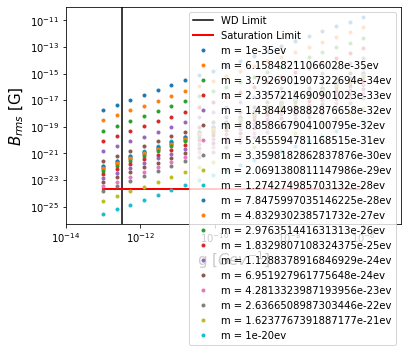

In [11]:
frms,axrms = plt.subplots()

plt.rcParams["figure.figsize"] = (12,7)

wdl = 3.3*10**-13
plt.xlabel(r'g $[Gev^{-1}]$', fontsize=15)
plt.ylabel(r'$B_{rms}$ [G]', fontsize=15)
plt.xscale('log');plt.yscale('log')
plt.xlim(ga[0]/10,ga[-1]*10)
wdplot = plt.axvline(wdl, c='k', label='WD Limit')
satlimplot = plt.plot(ga, np.sqrt(satlim[0])*ga/ga,'r-',linewidth=2.0, label='Saturation Limit')

for j in range(len(ma)):
    plt.plot(ga, Brms[j][:], ".", label = 'm = '+str(ma[j])+'ev')
        
plt.legend()
# plt.legend(handles=[wdplot, satlimplot])
plt.show()

frms.savefig('B_rms.pdf')

In [12]:
color = np.zeros((len(ma), len(ga)))
for i in range(len(ma)):
    for j in range(len(ga)):
        color[i][j] = m_e/ hbar/ e_char * (ma[i]*e_char)/ (Brms[i][j]*10**(-4))

td20 = 419194477429.8688 ###from timescales code z=20
tltdratio = np.zeros((len(ma), len(ga)))
for i in range(len(ma)):
    for j in range(len(ga)):
        tltdratio[i][j] = 2* np.pi * m_e/ e_char/ (Brms[i][j]*10**(-4)) / td20
        
# for j in range(len(ma)):
#     for i in range(len(ga)):
#         print('m =',ma[j], "ev ", "g =" , ga[i], "Gev-1" , "\t" , "color =", color[j][i], "?")
#     print('\n')


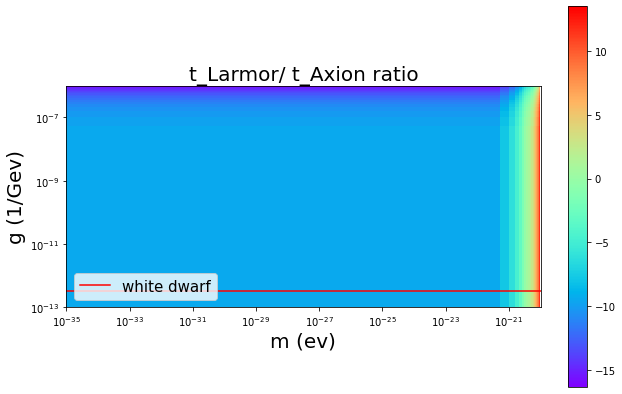

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

# plt.figure(figsize=(10,7))
plt.title("t_Larmor/ t_Axion ratio", fontsize= 20)
plt.xlabel("m (ev)", fontsize=20)
plt.ylabel("g (1/Gev)", fontsize=20)
image = plt.imshow(np.log10(color.T), cmap='rainbow', interpolation='nearest', origin='lower'
                  , extent=[(ma.min()),ma.max(),ga.min(),ga.max()])
plt.colorbar(image, orientation='vertical', fraction=.1)
plt.xscale('log');plt.yscale('log')
plt.rc('xtick',labelsize=15);plt.rc('ytick',labelsize=15)
plt.plot(ma, ma/ma*3.3*10**-13, "r", label = "white dwarf")
plt.legend(loc = 3, fontsize = 15)
plt.savefig("heatmap.pdf")
plt.show()

/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


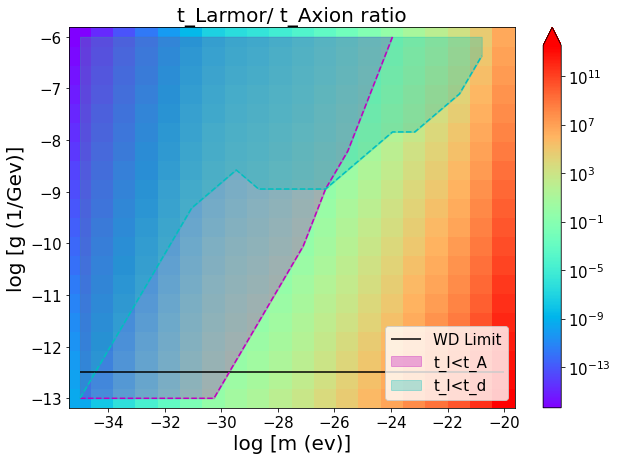

In [17]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,7))

plt.title("t_Larmor/ t_Axion ratio", fontsize= 20)
plt.xlabel("log [m (ev)]", fontsize=20)
plt.ylabel("log [g (1/Gev)]", fontsize=20)
# plt.xscale('log');plt.yscale('log')
pcm = ax.pcolor(np.log10(ma), np.log10(ga), color.T,
                   norm=colors.LogNorm(vmin=color.min(), vmax=color.max()),
                   cmap='rainbow', shading='auto')
fig.colorbar(pcm, ax=ax, extend='max', orientation='vertical')
###########3.3*10**-13 is the WD limit############
plt.hlines(np.log10(3.3*10**-13), np.log10(1.0*ma.min()), np.log10(1.0*ma.max()), "k", label = "WD Limit")
###############################Finding the sensitivity curve##########################
tlta_sens_x = np.zeros(len(ma)) 
tlta_sens_y = np.zeros(len(ma)) 

for i in range(len(ma)):
    for j in range(len(ga)):
        if (np.log10(color[i][j]) > 0):
            continue
        else:
            tlta_sens_x[i] = ma[i]
            tlta_sens_y[i] = ga[j]
        break
######################################################################################
plt.plot(np.log10(tlta_sens_x), np.log10(tlta_sens_y), "m--")
plt.fill_between(np.log10(ma), np.log10(tlta_sens_y), -6, alpha = 0.3, color = "m", label = "t_l<t_A")

plt.plot(np.log10(tltd_sens_x), np.log10(tltd_sens_y), "c--")
plt.fill_between(np.log10(ma), np.log10(tltd_sens_y), -6, alpha = 0.3, color = "c", label = "t_l<t_d")

plt.legend(loc = 4, fontsize = 15)
plt.savefig("heatmap_log_m35.pdf")
plt.show()

/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Users/aryanrahimieh/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


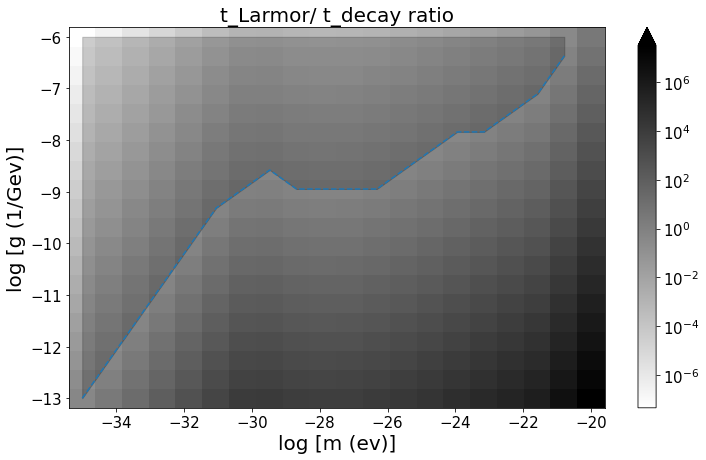

In [16]:
fig, ax = plt.subplots()

plt.title("t_Larmor/ t_decay ratio", fontsize= 20)
plt.xlabel("log [m (ev)]", fontsize=20)
plt.ylabel("log [g (1/Gev)]", fontsize=20)
# plt.xscale('log');plt.yscale('log')
pcm = ax.pcolor(np.log10(ma), np.log10(ga), tltdratio.T,
                   norm=colors.LogNorm(vmin=tltdratio.min(), vmax=tltdratio.max()),
                   cmap='binary', shading='auto')
fig.colorbar(pcm, ax=ax, extend='max', orientation='vertical')
###############################Finding the sensitivity curve##########################
tltd_sens_x = np.zeros(len(ma)) 
tltd_sens_y = np.zeros(len(ma)) 

for i in range(len(ma)):
    for j in range(len(ga)):
        if (np.log10(tltdratio[i][j]) > 0):
            continue
        else:
            tltd_sens_x[i] = ma[i]
            tltd_sens_y[i] = ga[j]
        break
######################################################################################
plt.plot(np.log10(tltd_sens_x), np.log10(tltd_sens_y), "--")
plt.fill_between(np.log10(ma), np.log10(tltd_sens_y), -6, alpha = 0.2, color = "k", label = "t_l<t_d")

plt.savefig("heatmap_log_tltd.pdf")
# pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()

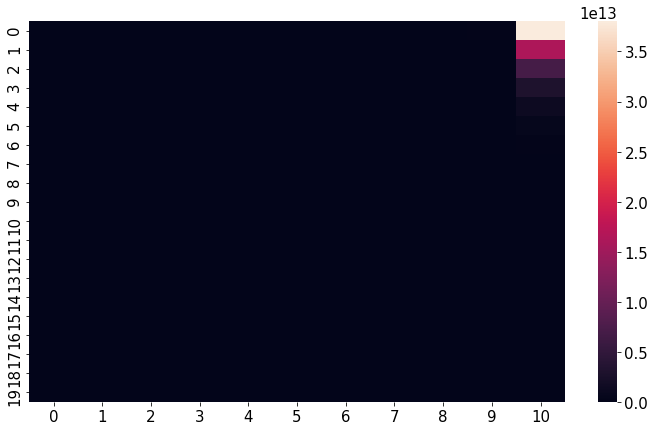

In [30]:
import seaborn as sb
fig, ax = plt.subplots()
ax = sb.heatmap(color.T)
# plt.plot(ma, ma/ma*3.3*10**-13, "r", label = "white dwarf")
# ax.hlines(3.3*10**-13, min(ma), max(ma), "r")
ax.hlines(5, min(ma), max(ma), "r")
plt.show()

In [14]:
np.log10(color)
# np.log10(color[0][0])
# np.log10(color.min())
# max(ma)

array([[ 1.27530663e-01, -2.40890389e-01, -6.09311442e-01,
        -9.77732494e-01, -1.34615355e+00, -1.71457460e+00,
        -2.08299565e+00, -2.45141670e+00, -2.81983776e+00,
        -3.18825881e+00, -3.55667986e+00, -3.92510092e+00,
        -4.29352197e+00, -4.66194302e+00, -5.03036407e+00,
        -5.39878513e+00, -5.76720618e+00, -6.13562723e+00,
        -6.50404828e+00, -6.87246934e+00],
       [ 1.77372758e+00,  1.40530653e+00,  1.03688547e+00,
         6.68464422e-01,  3.00043369e-01, -6.83776836e-02,
        -4.36798736e-01, -8.05219789e-01, -1.17364084e+00,
        -1.54206189e+00, -1.91048295e+00, -2.27890400e+00,
        -2.64732505e+00, -3.01574610e+00, -3.38416716e+00,
        -3.75258821e+00, -4.12100926e+00, -4.48943032e+00,
        -4.85785137e+00, -5.22627242e+00],
       [ 1.98705853e+00,  1.61863748e+00,  1.25021642e+00,
         8.81795370e-01,  5.13374317e-01,  1.44953265e-01,
        -2.23467788e-01, -5.91888840e-01, -9.60309893e-01,
        -1.32873095e+00, -1.6

In [52]:
fhand = open("color.txt","r+") 
# for line in fhand:
#     print(line)
    
firstline = "\t"
for i in range(len(ma)):
    firstline += format(ma[i],"1.1e") +"\t"

fhand.write(firstline + "\n")
seq = []

for j in range(len(ga)):
    seq = format(ga[j],"1.1e") + "\t"
    for i in range(len(ma)):
        seq += format(color[i][j],"1.1e") + "\t"
    seq += "\n"
    fhand.writelines(seq)
               
fhand.close()

In [16]:
fhand = open("tltd.txt","r+") 
# for line in fhand:
#     print(line)
    
firstline = "\t"
for i in range(len(ma)):
    firstline += format(ma[i],"1.1e") +"\t"

fhand.write(firstline + "\n")
seq = []

for j in range(len(ga)):
    seq = format(ga[j],"1.1e") + "\t"
    for i in range(len(ma)):
        seq += format(tltdratio[i][j],"1.1e") + "\t"
    seq += "\n"
    fhand.writelines(seq)
               
fhand.close()

In [14]:
g_test = 10**-9 #1/Gev
Beffk = g_test / Mu_e * (Mpc_inv*kka) * ( Ck * np.cos(m_test*t_test) + Dk * np.sin(m_test*t_test) ) / (2/(3*H0_Gev)) * (a_test)**(-3/2)



NameError: name 'm_test' is not defined

Finding the positions of the kmax and kmin in the array

In [ ]:
# ki = 0.01
# kf = np.pi
ki_arr = (np.abs(kka - k_min)).argmin()
kf_arr = (np.abs(kka - k_J)).argmin()
# print(k_min, k_J)
# print(ki_arr, kf_arr)
# print(kka[ki_arr], kka[kf_arr])

BB_int = integrate.cumtrapz(B2array, kka, initial=0)
plt.plot(kka, BB_int, 'ro')
plt.grid()

kmkjint = BB_int[kf_arr]-BB_int[ki_arr]
print("The value of the integral between k_min=", k_min , "and k_J=", k_J , "is", kmkjint)
print("The mean value between k_min=", round(k_min,5) , "and k_J=", round(k_J,5) , "is"
      , kmkjint/(k_J-k_min))
print(k_J-k_min)